epoch+1: 50  train loss: 209.64429  train mae: 11.565365  test loss: 178.29176  test mae: 10.415945
epoch+1: 100  train loss: 84.675644  train mae: 6.861862  test loss: 82.83914  test mae: 7.278457
epoch+1: 150  train loss: 48.182415  train mae: 4.9418445  test loss: 51.542015  test mae: 5.05724
epoch+1: 200  train loss: 36.384842  train mae: 4.2634816  test loss: 43.163475  test mae: 4.394358
epoch+1: 250  train loss: 26.449762  train mae: 3.5997803  test loss: 33.667713  test mae: 3.6580646
epoch+1: 300  train loss: 20.034763  train mae: 3.0496902  test loss: 26.250448  test mae: 3.044104
epoch+1: 350  train loss: 17.147057  train mae: 2.7980518  test loss: 22.331598  test mae: 2.8193288
epoch+1: 400  train loss: 15.811035  train mae: 2.6726913  test loss: 20.661646  test mae: 2.7226887
epoch+1: 450  train loss: 14.717411  train mae: 2.565925  test loss: 19.413397  test mae: 2.67228
epoch+1: 500  train loss: 13.758157  train mae: 2.477927  test loss: 18.426516  test mae: 2.626322
epo

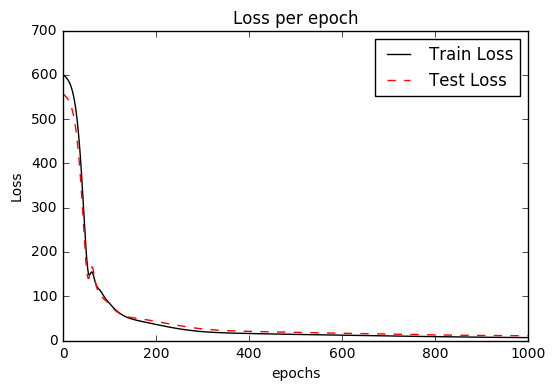

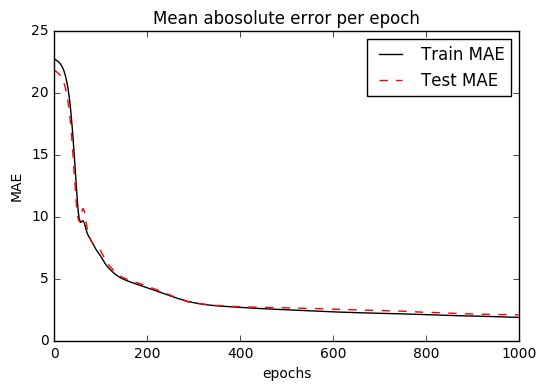

[[27.941956 ]
 [24.588917 ]
 [22.57658  ]
 [14.531333 ]
 [19.580282 ]
 [16.348446 ]
 [23.164028 ]
 [34.475735 ]
 [21.948135 ]
 [34.188534 ]
 [11.601064 ]
 [29.3336   ]
 [34.90669  ]
 [12.370437 ]
 [22.158577 ]
 [19.84451  ]
 [21.882795 ]
 [11.197573 ]
 [13.307834 ]
 [21.264557 ]
 [24.720814 ]
 [11.718665 ]
 [17.869081 ]
 [15.534669 ]
 [22.909817 ]
 [31.916182 ]
 [46.01425  ]
 [15.429982 ]
 [21.164944 ]
 [10.879979 ]
 [29.647366 ]
 [21.20678  ]
 [24.62696  ]
 [19.011692 ]
 [30.19313  ]
 [14.45876  ]
 [14.445615 ]
 [16.630726 ]
 [11.914397 ]
 [18.041485 ]
 [15.765411 ]
 [22.327496 ]
 [26.512094 ]
 [ 9.685081 ]
 [11.295999 ]
 [37.122833 ]
 [12.6767   ]
 [15.2248125]
 [21.051968 ]
 [21.784054 ]
 [12.352112 ]
 [19.142246 ]
 [18.044489 ]
 [21.256958 ]
 [18.675018 ]
 [30.388641 ]
 [12.205621 ]
 [22.847363 ]
 [13.95672  ]
 [15.905477 ]
 [20.955296 ]
 [29.314213 ]
 [12.191222 ]
 [25.83371  ]
 [ 9.157381 ]
 [17.702124 ]
 [29.535646 ]
 [32.004143 ]
 [13.543403 ]
 [46.692387 ]
 [23.33559  ]
 [10.9

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# 入力する部分
n_hiddens = [64, 64, 64]                   # 各隠れ層の次元数
max_epochs = 1000                      # 訓練のステップの数
print_interval = 50                    # 途中経過の印刷のインターバル
filename_train = 'ex2_boston_traindata.csv'    # 訓練用データのファイル名
filename_test = 'ex2_boston_testdata.csv'      # 確認用データのファイル名
explanatory_start_column = 2     # 説明変数の最初の列の列番号 2列目であれば2
explanatory_end_column =14      # 説明変数の最後の列の列番号 14列目であれば14
outcome_column = 15          # 目的変数（教師データ）の列番号 15列目であれば15
# 入力はここまで

explanatory_variables = np.arange(explanatory_start_column-1, explanatory_end_column)    
outcome_variables = [outcome_column-1]               

tf.set_random_seed(123)

def inference(x, n_in, n_hiddens, n_out):

    # 重み変数
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    # バイアス変数
    def bias_variable(shape):
        initial = tf.zeros(shape)
        return tf.Variable(initial)

    for i, n_hidden in enumerate(n_hiddens):
        if i == 0:    # 入力層から隠れ層
            input = x
            input_dim = n_in
        else:        # 隠れ層から隠れ層
            input = output
            input_dim = n_hiddens[i-1]

        W = weight_variable([input_dim, n_hidden])
        b = bias_variable([n_hidden])

        h = tf.nn.relu(tf.matmul(input, W) + b)
        output = h

    # 隠れ層から出力層
    W_out = weight_variable([n_hiddens[-1], n_out])
    b_out = bias_variable([n_out])
    y = tf.matmul(h, W_out) + b_out
    return y


def loss(y, t):
    # 値の予測の場合は以下の平均自乗誤差をロス関数を使う。
    mse = tf.reduce_mean(tf.square(y-t))
    loss = mse
    return loss

def training(loss):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,
                                       beta1=0.9,
                                       beta2=0.999)
    train_step = optimizer.minimize(loss)
    return train_step


def mae(y, t):
    mae = tf.reduce_mean(tf.abs(y-t)) 
    return mae



if __name__ == '__main__':

    # データの生成
    df1 = pd.read_csv(filename_train, skiprows=[0], header=None)
    df2 = np.array(df1.values.tolist())
    X_train = df2[:, explanatory_variables]
    Y_train = df2[:, outcome_variables]    

    df3 = pd.read_csv(filename_test, skiprows=[0], header=None)
    df4 = np.array(df3.values.tolist())
    X_test = df4[:, explanatory_variables]
    Y_test = df4[:, outcome_variables] 
    
    # 入力データを正規化
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    X_train = (X_train - X_min)/(X_max - X_min)
    X_test = (X_test - X_min)/(X_max - X_min)

    # モデル設定
    N_train = len(X_train[0])
    n_in = len(X_train[0])
    n_out = len(Y_train[0])

    x = tf.placeholder(tf.float32, shape=[None, n_in])
    t = tf.placeholder(tf.float32, shape=[None, n_out])

    y = inference(x, n_in=n_in, n_hiddens=n_hiddens, n_out=n_out)
    loss = loss(y, t)
    train_step = training(loss)

    mae = mae(y, t)

    history = {
        'val_loss': [],
        'val_mae': [],
        'val_loss_test': [],
        'val_mae_test': []
    }

    # モデル学習   

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    for epoch in range(max_epochs):
        sess.run(train_step, feed_dict={x: X_train, t: Y_train})    

        # データを用いた評価
        val_loss = loss.eval(session=sess, feed_dict={
            x: X_train,
            t: Y_train,
        })
        val_mae = mae.eval(session=sess, feed_dict={
            x: X_train,
            t: Y_train,
        })
        val_loss_test = loss.eval(session=sess, feed_dict={
            x: X_test,
            t: Y_test,
        })
        val_mae_test = mae.eval(session=sess, feed_dict={
            x: X_test,
            t: Y_test,
        })
        
        # データに対する学習の進み具合を記録
        history['val_loss'].append(val_loss)
        history['val_mae'].append(val_mae)
        history['val_loss_test'].append(val_loss_test)
        history['val_mae_test'].append(val_mae_test)
        
        if (epoch+1) % print_interval == 0:
            print('epoch+1:', epoch+1, ' train loss:', val_loss, ' train mae:', val_mae,
                 ' test loss:', val_loss_test, ' test mae:', val_mae_test)

    # 学習の進み具合を可視化
    # 計算ループごとのlossの動きをグラフ化。kは黒、rは赤、-は実線、-- は破線。
    plt.plot(history['val_loss'], 'k-', label='Train Loss')
    plt.plot(history['val_loss_test'], 'r--', label='Test Loss')
    plt.title('Loss per epoch')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # 計算ループごとの精度の動きをグラフ化
    plt.plot(history['val_mae'], 'k-', label='Train MAE')
    plt.plot(history['val_mae_test'], 'r--', label='Test MAE')
    plt.title('Mean abosolute error per epoch')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.show()
    
    # 予測値をcsvファイルに出力
    val_y = y.eval(session=sess, feed_dict={x: X_test})    
    np.savetxt('prediction_boston.csv', val_y, delimiter=',')
    print (val_y)    